Runga Kutta methoda are used to approximate the value to simultaneous non-linear differential equations. <br>
More about Runga Kutta Methods [here](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).

Here we will try to solve the following three equations with unknown variables S, I and R.

\begin{equation}
\frac{d S(t)}{d t}=A-\mu S(t)-\frac{r I}{N_0} S(t)
\end{equation}
<br>
$$
\frac{d I(t)}{d t}=\frac{r I(t)}{N_0} S(t)-(\mu+a) I(t)
$$
<br>
$$
\frac{d R(t)}{d t}=a I(t)-\mu R(t)
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
where, $\mathrm{S}(\mathrm{t})+\mathrm{I}(\mathrm{t})+\mathrm{R}(\mathrm{t})=\mathrm{N}(\mathrm{t})$
<br><br>
$$
=>\frac{N(t)}{d t}=A-\mu N
$$

These equations have a physical significance also, they represent the SIR model for the transmission of tuberclosis as documented [here](https://drive.google.com/file/d/1t2Rgh1jdEmT_aJ7RKAkDf0ZH_lhFM2sp/view?usp=sharing). 

S, I and R represent the following three konds of people:


1.   S: The first category is individuals who have not been infected with the TB virus, sometimes known as the suspicion group.  
2.   I: The second category consists of people who have been infected with
the TB virus.
3.   R: The last category consists of people who recovered or died
after being infected with the TB virus.




Other than S, I and R, all other terms are constants, and the equations can be represented as follows:

In [1]:
def dS_dt(S, I, R, t):
    return (1449401 -  0.001167*S - (0.5/1449401)*I*S)

In [2]:
def dI_dt(S, I, R, t):
    return ((0.5/1449401)*I*S - (0.001167 + 0.111111)*I)

In [3]:
def dR_dt(S, I, R, t):
    return  (0.111111*I - 0.001167*R)

In [4]:
t = int(input())  # Enter a required value of time where you want the value of S, I and R.

10


In [5]:
S_data = []
I_data = []
R_data = []
SIR_data = []
N_data = []
Time = []

**Runge-Kutta method implementation with S,I,R as dependent variables and t as independent variable**

In [6]:
def rungeKutta(S0, I0, R0, t, h):

  # No of iterations = n
  # Step size = h
    n = (int)((t)/h)
  
  # setting initial values
    S = S0
    I = I0
    R = R0

  # implementation of runge-kutta
    for i in range(1, n + 1):
        kS1 = dS_dt(S, I, R, t)
        kI1 = dI_dt(S, I, R, t)
        kR1 = dR_dt(S, I, R, t)
        
        kS2 = dS_dt(S + 0.5 * h * kS1, I + 0.5 * h * kI1, R + 0.5 * h * kR1, t + 0.5*h)
        kI2 = dI_dt(S + 0.5 * h * kS1, I + 0.5 * h * kI1, R + 0.5 * h * kR1, t + 0.5*h)
        kR2 = dR_dt(S + 0.5 * h * kS1, I + 0.5 * h * kI1, R + 0.5 * h * kR1, t + 0.5*h)

        kS3 = dS_dt(S + 0.5 * h * kS2, I + 0.5 * h * kI2, R + 0.5 * h * kR2, t + 0.5*h)
        kI3 = dI_dt(S + 0.5 * h * kS2, I + 0.5 * h * kI2, R + 0.5 * h * kR2, t + 0.5*h)
        kR3 = dR_dt(S + 0.5 * h * kS2, I + 0.5 * h * kI2, R + 0.5 * h * kR2, t + 0.5*h)

        kS4 = dS_dt(S + kS3 * h, I + kI3 * h, R + kR3 * h, t + h)
        kI4 = dI_dt(S + kS3 * h, I + kI3 * h, R + kR3 * h, t + h)
        kR4 = dR_dt(S + kS3 * h, I + kI3 * h, R + kR3 * h, t + h)
 
        # Updating S, I, R
        S = S + (1.0 / 6.0)*(kS1 + 2 * kS2 + 2 * kS3 + kS4)*h
        I = I + (1.0 / 6.0)*(kI1 + 2 * kI2 + 2 * kI3 + kI4)*h
        R = R + (1.0 / 6.0)*(kR1 + 2 * kR2 + 2 * kR3 + kR4)*h

        S_data.append(S)
        I_data.append(I)
        R_data.append(R)
        SIR_data.append(S+I+R)
        Time.append(t)

        # Updating value of t
        t += h
    
    # printing N(t) at desired t (N(t)=S(t)+I(t)+R(t))
    print("N(t) = " ,S+I+R)
    return [S,I,R]

In [7]:
# Driver Code
S0 = 1446093
I0 = 1885
R0 = 1423
h = 0.01
print ('The value of S(t), I(t) and R(t) is:', rungeKutta(S0, I0, R0, t, h)) 

N(t) =  15842350.284962129
The value of S(t), I(t) and R(t) is: [410394.8072337986, 10323985.625711355, 5107969.852016973]


**Runge-Kutta method implementation with N as dependent variable and t as independent variable**

We implemented it just to prove that the equation N(t) = S(t)+I(t)+R(t) is consistent with the values of S,I,R we got above for the same value of t.

In [8]:
def dN_dt(t, N):
	return (1449401-0.001167*N)

# implementing runge kutta method for ODE: dN/dt = A - m*N where m is death rate
def rungeKutta(t0, A, t, h):

	# no. of iterations = n
	# step size = h
	n = (int)((t - t0)/h)
	
	N = A
	for i in range(1, n + 1):
		k1 = dN_dt(t0, N)
		k2 = dN_dt(t0 + 0.5 * h, N + 0.5 * h * k1)
		k3 = dN_dt(t0 + 0.5 * h, N + 0.5 * h * k2)
		k4 = dN_dt(t0 + h, N + h * k3)

		# Update value of y
		N = N + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)*h
		N_data.append(N)

		# Update next value of t0
		t0 += h
	return N

# Driver Code
t0 = 0
A = 1449401
h = 0.01
print ('The value of N(t) at required t is:', rungeKutta(t0, A, t, h))

The value of N(t) at required t is: 15842350.284962097


In [9]:
# print(S_data)

[1460560.580747789, 1475027.860879939, 1489494.8390278562, 1503961.5137979928, 1518427.8837714759, 1532893.9475037288, 1547359.703524085, 1561825.1503353936, 1576290.2864136165, 1590755.1102074175, 1605219.620137743, 1619683.8145973939, 1634147.691950589, 1648611.2505325184, 1663074.4886488894, 1677537.404575462, 1691999.9965575747, 1706462.2628096617, 1720924.201514759, 1735385.810824002, 1749847.0888561103, 1764308.0336968657, 1778768.6433985755, 1793228.9159795286, 1807688.8494234376, 1822148.4416788716, 1836607.6906586767, 1851066.5942393842, 1865525.150260608, 1879983.3565244288, 1894441.2107947667, 1908898.71079674, 1923355.8542160117, 1937812.6386981232, 1952269.0618478132, 1966725.121228324, 1981180.814360693, 1995636.138723031, 2010091.0917497831, 2024545.670830979, 2038999.8733114637, 2053453.6964901153, 2067907.1376190458, 2082360.1939027866, 2096812.8624974564, 2111265.1405099123, 2125717.0249968846, 2140168.5129640936, 2154619.6013653474, 2169070.2871016227, 2183520.567020

In [10]:
# print(I_data)

[1892.3483741664857, 1899.8202092543936, 1907.4167380642982, 1915.1392169696821, 1922.9889262614138, 1930.967170499565, 1939.0752788727057, 1947.3146055648103, 1955.6865301299204, 1964.1924578747037, 1972.8338202490602, 1981.612075244925, 1990.5287078034216, 1999.5852302305248, 2008.7831826213942, 2018.124133293544, 2027.6096792290182, 2037.2414465257432, 2047.0210908582376, 2056.950297947856, 2067.030784042758, 2077.264296407785, 2087.6526138244444, 2098.1975471011965, 2108.900939594248, 2119.7646677390608, 2130.7906415927846, 2141.9808053878346, 2153.3371380968338, 2164.8616540091493, 2176.5564033192522, 2188.4234727271423, 2200.4649860510763, 2212.683104852852, 2225.0800290759034, 2237.6579976964626, 2250.4192893880586, 2263.3662231996236, 2276.501159247487, 2289.8264994215397, 2303.3446881058608, 2317.058212914109, 2330.9696054399747, 2345.0814420230145, 2359.396344530181, 2373.916981153378, 2388.6460672233707, 2403.5863660403984, 2418.740689721834, 2434.1119000672516, 2449.7029094

In [11]:
# print(R_data)

[1425.081894850866, 1427.171998686538, 1429.2704492718005, 1431.377385752664, 1433.4929486827307, 1435.6172800499492, 1437.7505233037602, 1439.892823382649, 1442.0443267421074, 1444.2051813830162, 1446.3755368804577, 1448.5555444129664, 1450.7453567922253, 1452.9451284932218, 1455.1550156848673, 1457.3751762610948, 1459.6057698724408, 1461.8469579581242, 1464.0989037786314, 1466.361772448818, 1468.6357309715381, 1470.9209482718115, 1473.2175952315415, 1475.5258447247923, 1477.8458716536397, 1480.1778529846056, 1482.5219677856885, 1484.8783972640028, 1487.2473248040392, 1489.6289360065575, 1492.0234187281285, 1494.4309631213328, 1496.851761675636, 1499.2860092589492, 1501.7339031598917, 1504.1956431307694, 1506.6714314312828, 1509.1614728729817, 1511.6659748644795, 1514.1851474574444, 1516.7192033933816, 1519.2683581512251, 1521.8328299957534, 1524.4128400268478, 1527.008612229609, 1529.6203735253507, 1532.248353823488, 1534.8927860743383, 1537.5539063228543, 1540.2319537633077, 1542.92

In [12]:
# print(Time)

[10, 10.01, 10.02, 10.03, 10.04, 10.049999999999999, 10.059999999999999, 10.069999999999999, 10.079999999999998, 10.089999999999998, 10.099999999999998, 10.109999999999998, 10.119999999999997, 10.129999999999997, 10.139999999999997, 10.149999999999997, 10.159999999999997, 10.169999999999996, 10.179999999999996, 10.189999999999996, 10.199999999999996, 10.209999999999996, 10.219999999999995, 10.229999999999995, 10.239999999999995, 10.249999999999995, 10.259999999999994, 10.269999999999994, 10.279999999999994, 10.289999999999994, 10.299999999999994, 10.309999999999993, 10.319999999999993, 10.329999999999993, 10.339999999999993, 10.349999999999993, 10.359999999999992, 10.369999999999992, 10.379999999999992, 10.389999999999992, 10.399999999999991, 10.409999999999991, 10.419999999999991, 10.42999999999999, 10.43999999999999, 10.44999999999999, 10.45999999999999, 10.46999999999999, 10.47999999999999, 10.48999999999999, 10.49999999999999, 10.50999999999999, 10.519999999999989, 10.5299999999999

In [13]:
# print(N_data)

[1463878.0110168064, 1478354.85308788, 1492831.5262151924, 1507308.0304007153, 1521784.36564642, 1536260.5319542782, 1550736.5293262615, 1565212.357764341, 1579688.0172704884, 1594163.507846675, 1608638.8294948724, 1623113.9822170518, 1637588.9660151845, 1652063.780891242, 1666538.4268471955, 1681012.9038850165, 1695487.212006676, 1709961.3512141453, 1724435.3215093957, 1738909.1228943984, 1753382.7553711245, 1767856.218941545, 1782329.5136076314, 1796802.6393713546, 1811275.5962346855, 1825748.3841995953, 1840221.0032680552, 1854693.453442036, 1869165.7347235088, 1883637.8471144445, 1898109.790616814, 1912581.5652325884, 1927053.1709637386, 1941524.6078122351, 1955995.8757800492, 1970466.9748691514, 1984937.9050815126, 1999408.6664191037, 2013879.2588838954, 2028349.6824778584, 2042819.9372029633, 2057290.023061181, 2071759.9400544818, 2086229.6881848369, 2100699.2674542167, 2115168.6778645916, 2129637.919417932, 2144106.992116209, 2158575.895961393, 2173044.6309554544, 2187513.197100

**Variation of S, I, R and N with time.**

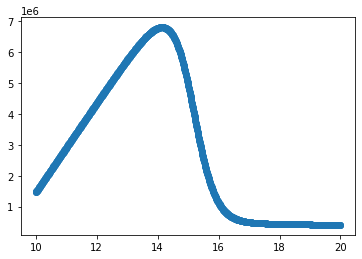

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(20,38, 1000)
plt.scatter(Time, S_data)

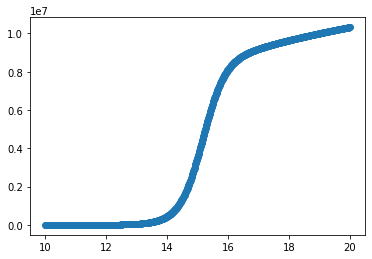

In [15]:
plt.scatter(Time, I_data)

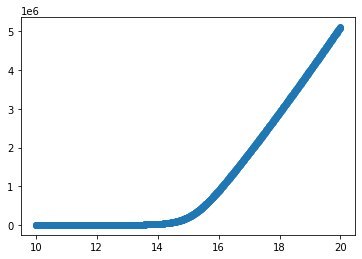

In [16]:
plt.scatter(Time, R_data)

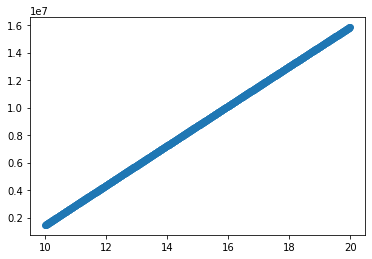

In [17]:
plt.scatter(Time, N_data)